GRAPH MINING

Analyse d'un article et de ses résultats.

PRIMARY SCHOOL: Cumulative network: jour 1

In [ ]:
# Commençons par importer les  librairies utiles ainsi que les données, sous forme de réseau.

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#df = nx.read_gexf("sp_data_school_day_1_g.gexf")


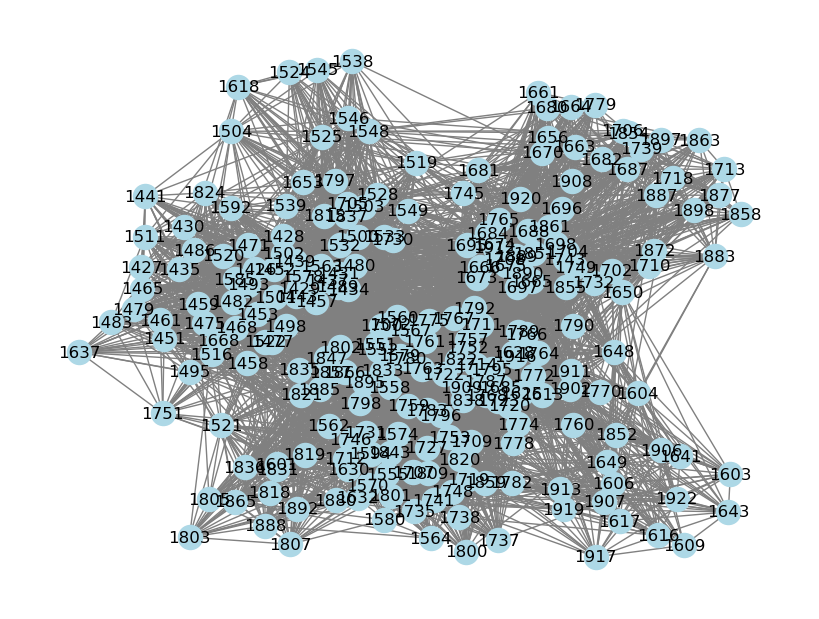

In [ ]:
# Première représentation de notre graphe, première idée.

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

### Graphe simple
Une seule arête entre les noeuds mais pondérée par la somme des durées des contacts entre les noeuds

In [26]:
G0 = nx.read_gexf("sp_data_school_day_1_g.gexf")
print(G0.nodes(data=True))
print(G0.edges(data=True))

[('1789', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}), ('1780', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': 37.34756, 'y': 63.289124, 'z': 0.0}}, 'label': '1780'}), ('1782', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': -228.26913, 'y': 181.72375, 'z': 0.0}}, 'label': '1782'}), ('1783', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -64.468575, 'y': 80.36716, 'z': 0.0}}, 'label': '1783'}), ('1787', {'classname': '1A', 'gender': 'F', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -138.05147, 'y': -21.946629, 'z': 0.0}}, 'label': '1787'}), ('1546', {'classname': '4A', 'gender': 'F', 'viz': {'color': {'r': 252, 'g': 97, 'b': 255

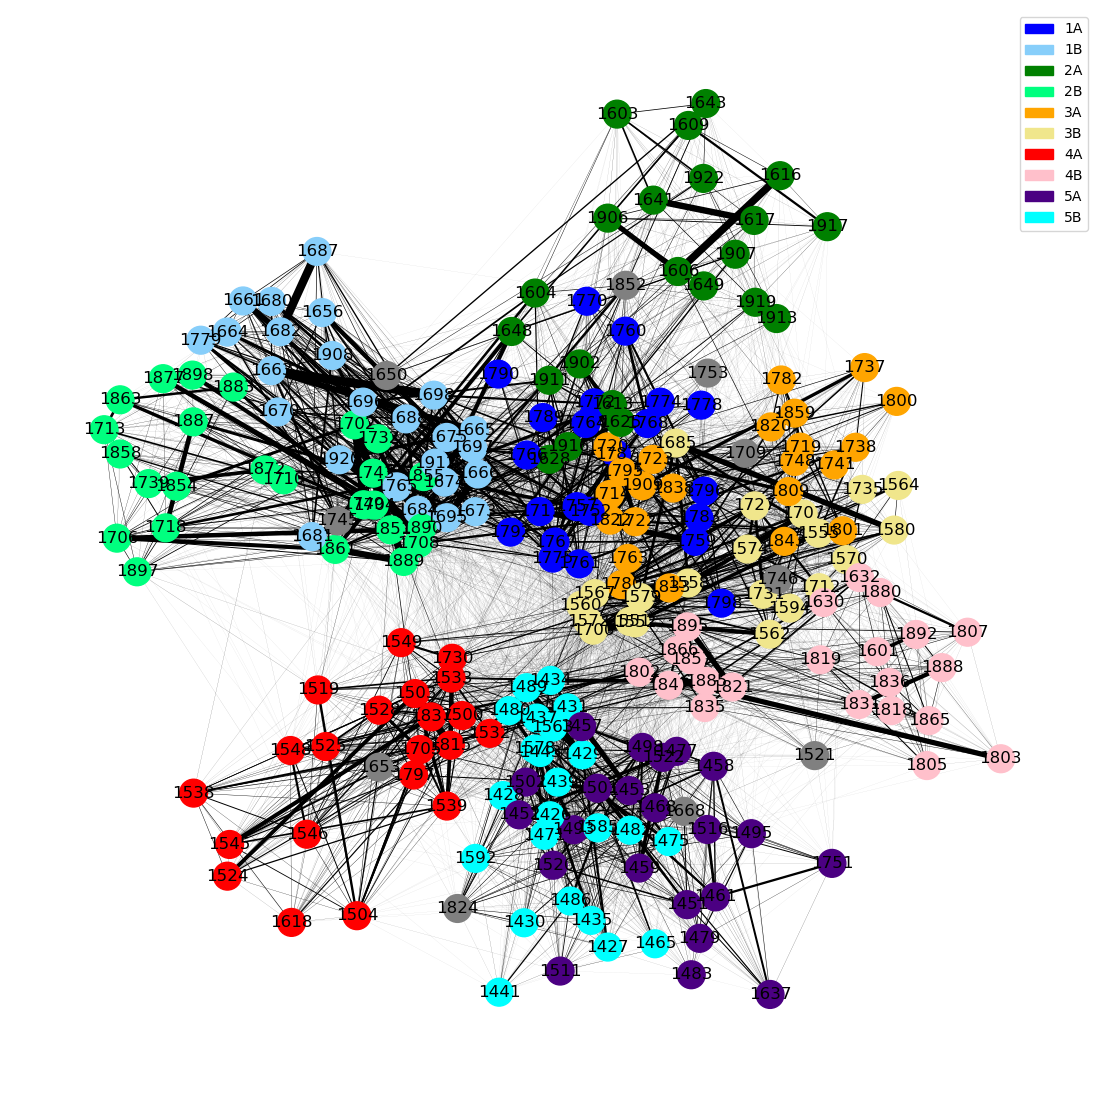

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# Construction d’un graphe pondéré
G = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G0.nodes(data=True):
    
    G.add_node(n, category=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
for u, v, data in G0.edges(data=True):
    
    w = data.get("duration", 1)
    G.add_edge(u, v, duration=w)

#    Affichage pondéré 

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan"
}

node_colors = [
    color_map.get(G.nodes[n].get("category", "PAT"), "gray")
    for n in G.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles
edges = G.edges()
edge_weights = [G[u][v]["duration"] for u, v in edges]
max_w = max(edge_weights)
edge_widths = [10 * w / max_w for w in edge_weights]

nx.draw(
    G,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.show()







In [48]:
nx.diameter(G)

print(G0.nodes('1521'))

[('1789', None), ('1780', None), ('1782', None), ('1783', None), ('1787', None), ('1546', None), ('1774', None), ('1545', None), ('1836', None), ('1770', None), ('1772', None), ('1838', None), ('1779', None), ('1778', None), ('1548', None), ('1549', None), ('1775', None), ('1695', None), ('1468', None), ('1674', None), ('1675', None), ('1670', None), ('1673', None), ('1551', None), ('1798', None), ('1759', None), ('1792', None), ('1697', None), ('1790', None), ('1797', None), ('1796', None), ('1795', None), ('1560', None), ('1493', None), ('1495', None), ('1800', None), ('1498', None), ('1555', None), ('1700', None), ('1702', None), ('1552', None), ('1704', None), ('1705', None), ('1706', None), ('1707', None), ('1708', None), ('1558', None), ('1821', None), ('1820', None), ('1822', None), ('1579', None), ('1698', None), ('1668', None), ('1666', None), ('1665', None), ('1664', None), ('1663', None), ('1661', None), ('1920', None), ('1482', None), ('1922', None), ('1480', None), ('1486'

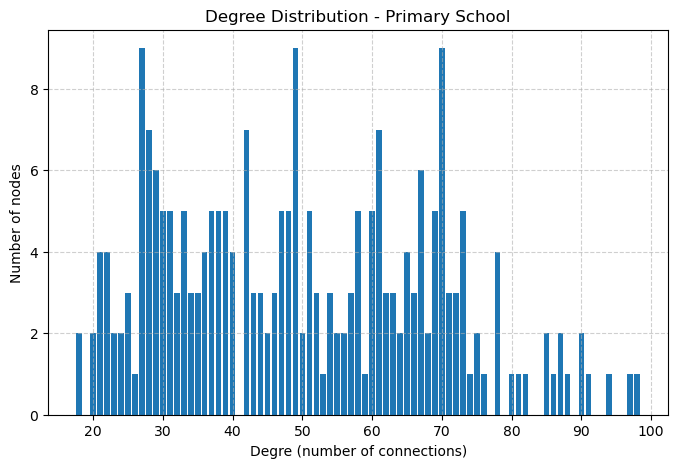

In [5]:
"""DEGREE Distribution"""

degrees=[d for n , d in G.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=range(min(degrees),max(degrees)+2), align ='left', rwidth=0.8)

plt.title("Degree Distribution - Primary School")
plt.xlabel("Degre (number of connections)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle = '--', alpha= 0.6)
plt.show()


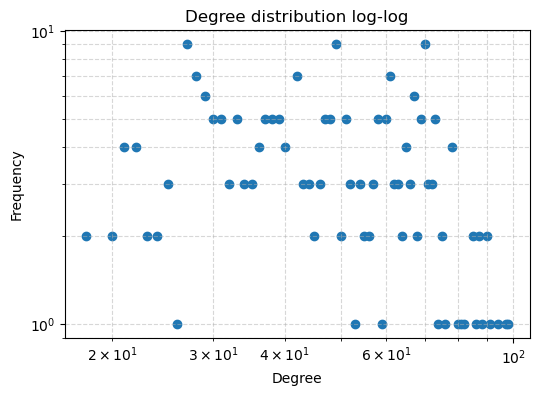

In [ ]:


degree_count = {}
for d in degrees:
    degree_count[d] =degree_count.get(d,0)+1

x=np.array(list(degree_count.keys()))
y=np.array(list(degree_count.values()))

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree distribution log-log")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True,which="both", linestyle='--',alpha= 0.5)
plt.show()

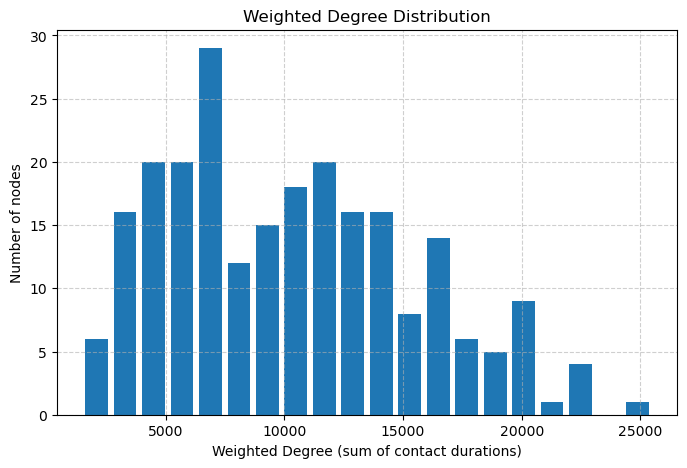

In [ ]:
# Calcul du degree pondéré (somme des 'duration' pour chaque noeud)

weighted_degrees = [d for n, d in G.degree(weight="duration")]

plt.figure(figsize=(8, 5))
plt.hist(weighted_degrees, bins=20, rwidth=0.8)

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree (sum of contact durations)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

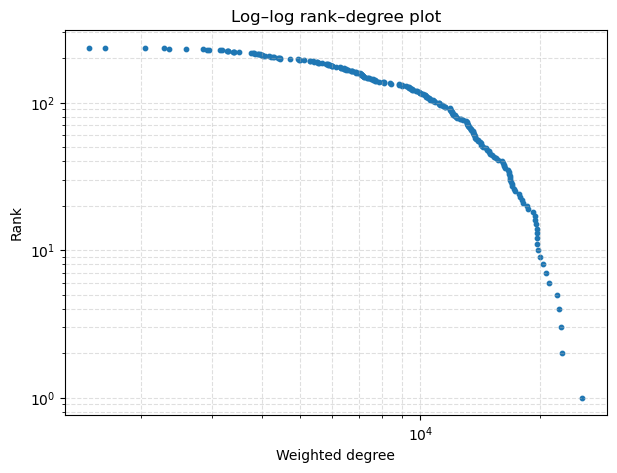

In [41]:

weighted_degrees_sorted = np.sort(weighted_degrees)[::-1]
ranks = np.arange(1, len(weighted_degrees_sorted) + 1)

plt.figure(figsize=(7,5))
plt.scatter(weighted_degrees_sorted, ranks, s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weighted degree")
plt.ylabel("Rank")
plt.title("Log–log rank–degree plot")
plt.grid(True, which="both", linestyle='--', alpha=0.4)
plt.show()

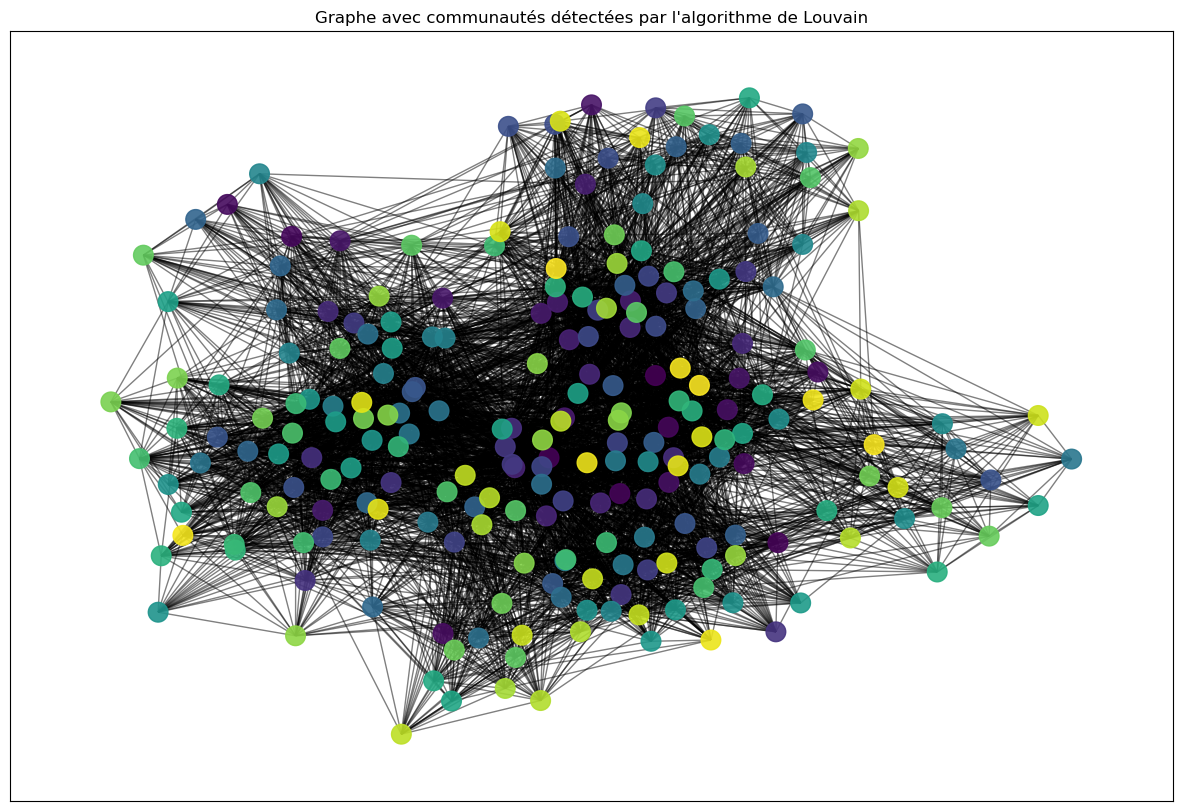

In [ ]:
# Appliquons l'algorithme de Louvain pour la détection de communautés.

nx.community.louvain_communities(G, seed= 42)



# Définir les couleurs pour chaque communauté
pos = nx.spring_layout(G) # Positions des nœuds
cmap = plt.get_cmap('viridis') # Choix d'une palette de couleurs


# Tracer le graphe
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos, node_color=range(236), node_size=200, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Graphe avec communautés détectées par l'algorithme de Louvain")
plt.show()



In [8]:
"""Mesure du diamètre du graphe"""

nx.diameter(G)

3